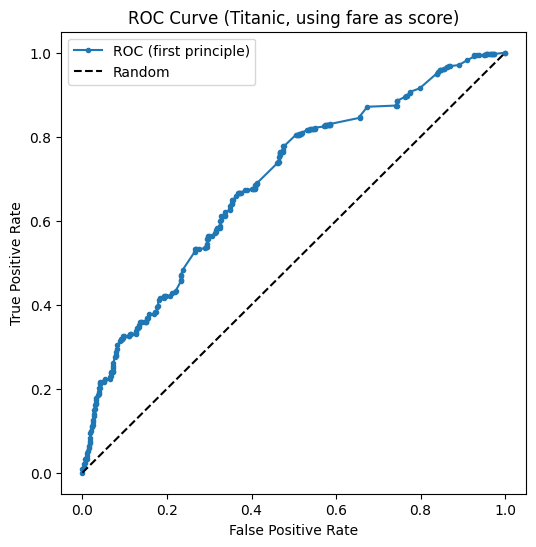

Manual AUC: 0.6921
sklearn roc_auc_score: 0.6921


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Load data
df = pd.read_csv('../titanic.csv')
y_true = df['survived'].values
# For demonstration, use 'fare' as a score (replace with your model's predicted probabilities if available)
y_score = df['fare'].values

# First principles ROC curve
thresholds = np.unique(np.sort(y_score))[::-1]
tpr = []
fpr = []
P = np.sum(y_true == 1)
N = np.sum(y_true == 0)

for thresh in thresholds:
    y_pred = (y_score >= thresh).astype(int)
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    TPR = TP / P if P > 0 else 0
    FPR = FP / N if N > 0 else 0
    tpr.append(TPR)
    fpr.append(FPR)

# Add (0,0) and (1,1) for completeness
tpr = [0] + tpr + [1]
fpr = [0] + fpr + [1]

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, marker='.', label='ROC (first principle)')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Titanic, using fare as score)')
plt.legend()
plt.show()

# Calculate AUC (trapezoidal rule)
auc_manual = np.trapezoid(tpr, fpr)
print(f"Manual AUC: {auc_manual:.4f}")

# Compare with sklearn
auc_sklearn = roc_auc_score(y_true, y_score)
print(f"sklearn roc_auc_score: {auc_sklearn:.4f}")